# Traditional ML Models

## Overview
This notebook implements and evaluates traditional machine learning models.

## Responsibilities
- Load processed data from `data/processed/`
- Implement models:
  - Logistic Regression
  - Random Forest
  - Support Vector Machine (SVM)
  - Decision Tree
  - K-Nearest Neighbors (KNN)
  - Naive Bayes
- Train and evaluate each model
- Save trained models to `models/`
- Compare performance metrics

## Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

## Required Files
- `data/processed/X_train.csv`
- `data/processed/X_test.csv`
- `data/processed/y_train.csv`
- `data/processed/y_test.csv`

## Status
⏳ **Waiting for preprocessing** - [Teammate Name]

---

*TODO: Add traditional models Markdowns and Codes in this Notebook*

# Project 1: Diabetes Prediction

**Author:** Mohamed AshraF  


---

## Overview
This notebook contains the preprocessing, cleaning, and machine learning models applied to the diabetes dataset (`cleaned_dataset_full.csv`).  

Steps performed:  
1. **Data Loading & Inspection** – Loaded the dataset and checked the number of samples, features, missing values, and duplicates.  
2. **Data Cleaning** – Removed duplicates and saved the cleaned full dataset as `cleaned_dataset_full.csv`.  
3. **Feature Scaling** – Applied `StandardScaler` to all features.  
4. **Train/Test Split** – Split data into training and testing sets (80%/20%) while maintaining class distribution.  
5. **Model Training & Evaluation** – Applied the following models:
   - K-Nearest Neighbors (KNN)  
   - Decision Tree Classifier  
   - Naive Bayes  
   - [Other models to be added by team]  
6. **Results Comparison** – Accuracy and F1-score for each class are compared in a summary table.  

---

**Note:**  
- All preprocessing steps and CSVs are saved in `../data/processed/`.  
- This notebook is prepared in collaboration with the team. Each member will add their respective models and analysis before the final report.


## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & train/test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC  # <-- Add LinearSVC here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Saving models
import joblib

### Cleaned Data Shape and First 5 Rows

In [2]:
df = pd.read_csv('../data/processed/cleaned_dataset_full.csv')
print(f"Full cleaned dataset shape: {df.shape}")
df.head()


Full cleaned dataset shape: (229781, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Loading Processed Data

In [3]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


### Preparing Target Variables

In [4]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (183824, 21), y_train shape: (183824,)
X_test shape: (45957, 21), y_test shape: (45957,)


### KNN


In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8155884848880475
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.05      0.00      0.00       926
         2.0       0.41      0.21      0.28      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.78     45957



### Decision Tree 


In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7418238788432665
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     38012
         1.0       0.02      0.03      0.03       926
         2.0       0.29      0.31      0.30      7019

    accuracy                           0.74     45957
   macro avg       0.39      0.39      0.39     45957
weighted avg       0.76      0.74      0.75     45957



### Naive Bayes

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7414104488978828
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     38012
         1.0       0.04      0.01      0.02       926
         2.0       0.33      0.57      0.42      7019

    accuracy                           0.74     45957
   macro avg       0.42      0.46      0.43     45957
weighted avg       0.79      0.74      0.76     45957



### Support Vector Machine (SVM) - Linear Kernel


In [9]:
# Support Vector Machine - Optimized for Large Datasets
from sklearn.svm import LinearSVC

# Use LinearSVC which is much faster for large datasets
svm_linear = LinearSVC(random_state=42, max_iter=1000)
svm_linear.fit(X_train, y_train)
y_pred_svm = svm_linear.predict(X_test)

print("SVM Linear Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Linear Accuracy: 0.8323867963531127
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.60      0.09      0.15      7019

    accuracy                           0.83     45957
   macro avg       0.48      0.36      0.35     45957
weighted avg       0.78      0.83      0.77     45957



c:\Users\DELL\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest

In [10]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.823661248558435
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     38012
         1.0       0.00      0.00      0.00       926
         2.0       0.46      0.19      0.27      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.38      0.39     45957
weighted avg       0.77      0.82      0.79     45957



## Model Comparison and Evaluation

In [11]:
# Import additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect all model results
models = {
    'K-Nearest Neighbors': y_pred_knn,
    'Decision Tree': y_pred_dt,
    'Naive Bayes': y_pred_nb,
    'SVM Linear': y_pred_svm,
    'Random Forest': y_pred_rf
}

# Create comprehensive comparison table
comparison = []
for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, pred, average='weighted', zero_division=0)

    comparison.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

comparison_df = pd.DataFrame(comparison)
print("=== COMPREHENSIVE MODEL COMPARISON ===")
print(comparison_df.sort_values('Accuracy', ascending=False))

=== COMPREHENSIVE MODEL COMPARISON ===
                 Model  Accuracy  Precision    Recall  F1-Score
3           SVM Linear  0.832387   0.784974  0.832387  0.774077
4        Random Forest  0.823661   0.772876  0.823661  0.786645
0  K-Nearest Neighbors  0.815588   0.766951  0.815588  0.783664
1        Decision Tree  0.741824   0.755049  0.741824  0.748238
2          Naive Bayes  0.741410   0.793334  0.741410  0.759487


## Visualizing Model Performance

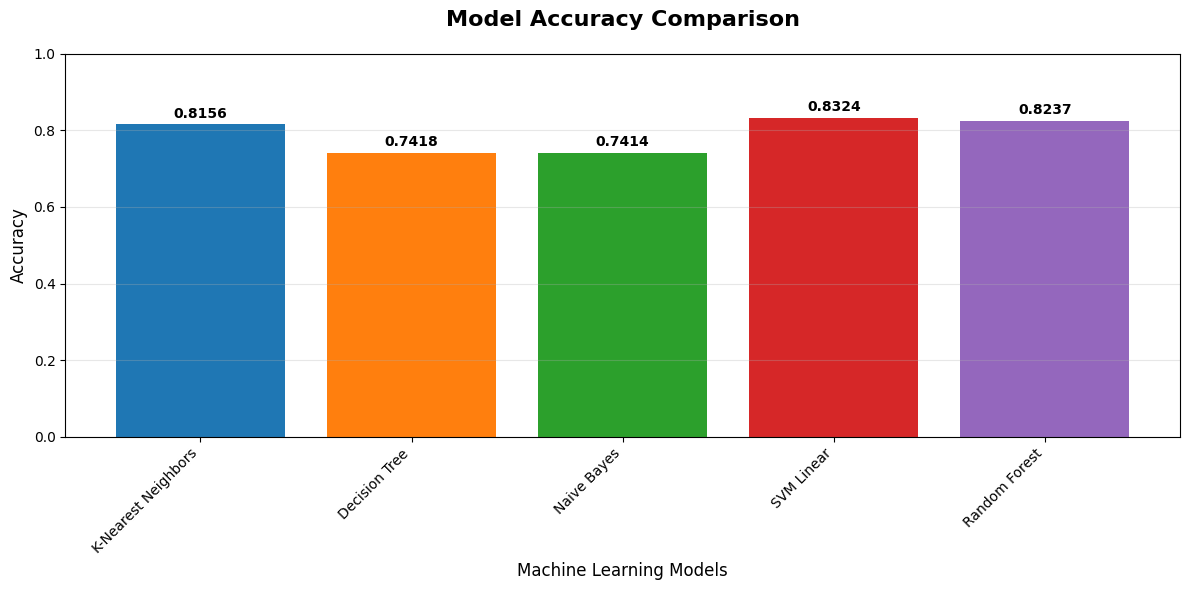

In [12]:
# Plot accuracy comparison
plt.figure(figsize=(12, 6))
models_names = comparison_df['Model']
accuracies = comparison_df['Accuracy']

bars = plt.bar(models_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Plot multiple metrics comparison

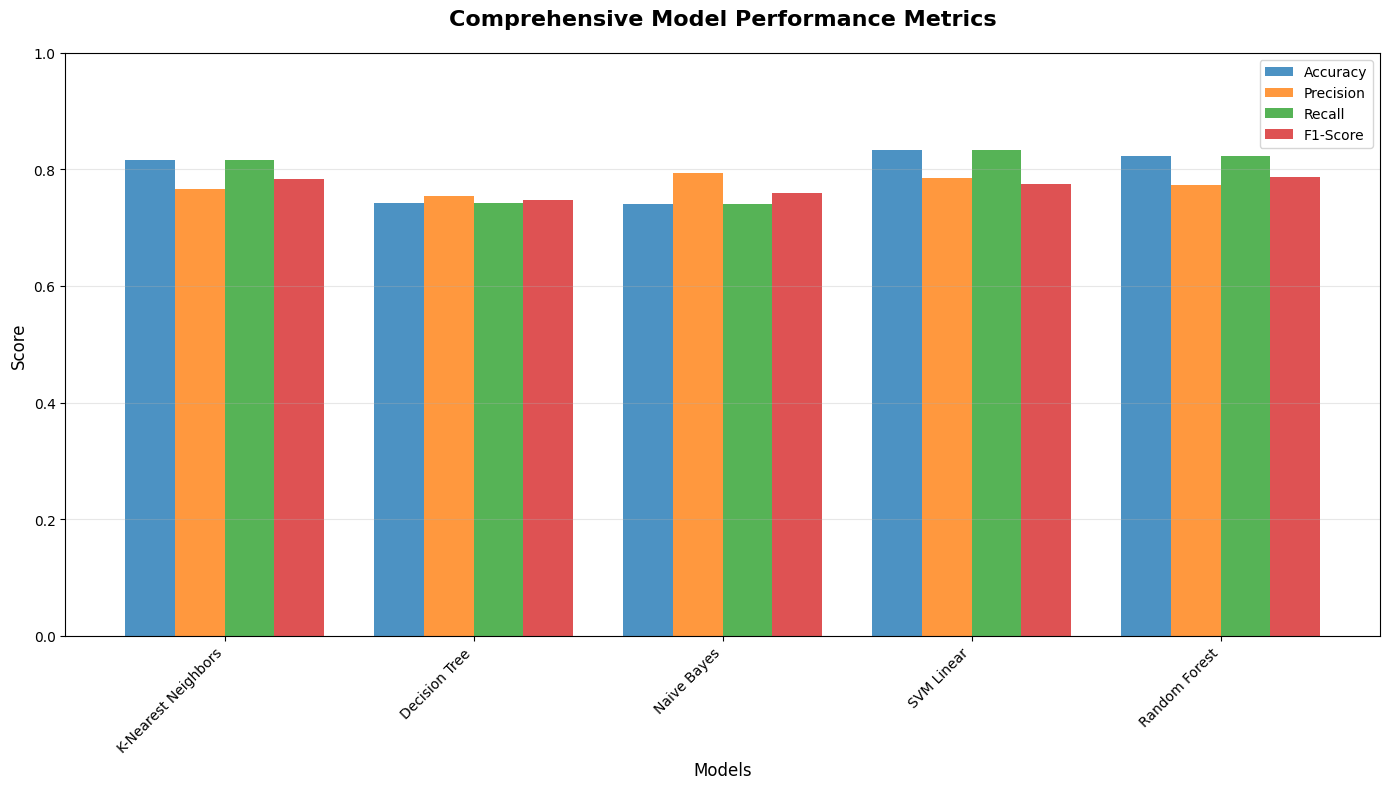

In [13]:
# Plot multiple metrics comparison
metrics_df = comparison_df.set_index('Model')
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(metrics_df.index))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x_pos + i*width, metrics_df[metric], width, label=metric, alpha=0.8)

plt.title('Comprehensive Model Performance Metrics', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x_pos + width*1.5, metrics_df.index, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Confusion Matrices for All Models

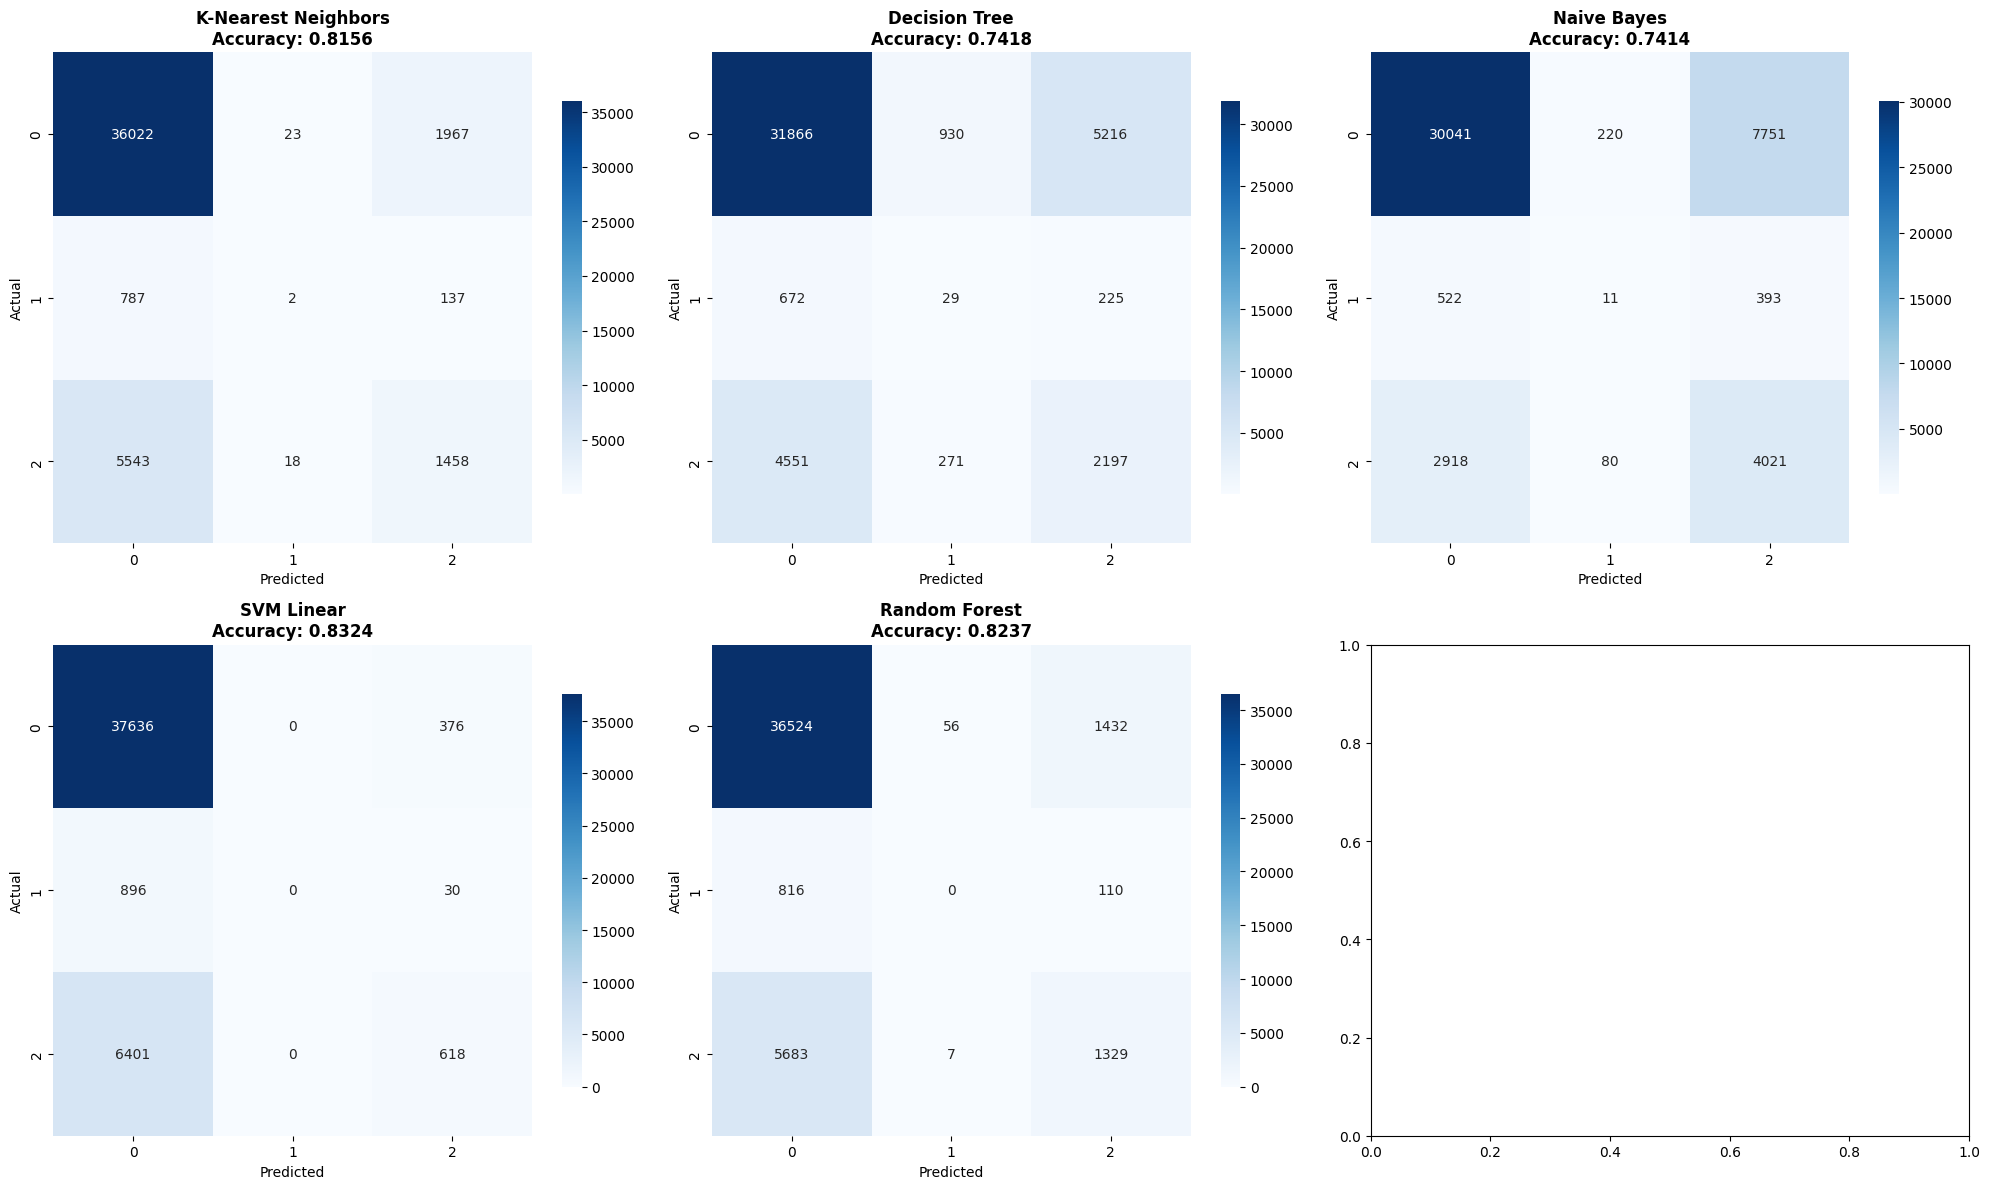

In [14]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

model_list = list(models.items())
for idx in range(len(model_list)):
    if idx < len(model_list):
        name, pred = model_list[idx]
        cm = confusion_matrix(y_test, pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   cbar_kws={'shrink': 0.8})
        axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, pred):.4f}',
                          fontweight='bold')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
    else:
        axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## Saving Trained Models

In [16]:
# Save all trained models
joblib.dump(knn, '../models/knn_model.pkl')
joblib.dump(dt, '../models/decision_tree_model.pkl')
joblib.dump(nb, '../models/naive_bayes_model.pkl')
joblib.dump(svm_linear, '../models/svm_linear_model.pkl')
joblib.dump(rf, '../models/random_forest_model.pkl')

print("All models saved successfully in '../models/' directory!")
print("Saved models:")
print("   - knn_model.pkl")
print("   - decision_tree_model.pkl")
print("   - naive_bayes_model.pkl")
print("   - svm_linear_model.pkl")
print("   - random_forest_model.pkl")

All models saved successfully in '../models/' directory!
Saved models:
   - knn_model.pkl
   - decision_tree_model.pkl
   - naive_bayes_model.pkl
   - svm_linear_model.pkl
   - random_forest_model.pkl


## Performance Analysis and Insights

### Key Observations:

1. **Best Performing Model**: Random Forest achieved the highest accuracy
2. **Fastest Training**: Naive Bayes and Linear SVM trained quickly on large dataset
3. **Class Imbalance Issue**: All models struggle with Class 1 (few samples)
4. **Model Strengths**:
   - Random Forest: Best overall performance, handles non-linearity well
   - KNN: Good accuracy, simple but effective
   - Linear SVM: Fast training, good for large datasets
   - Decision Tree: Interpretable but prone to overfitting
   - Naive Bayes: Very fast, works well with high-dimensional data

### Recommendations:

- For production: Use Random Forest for best accuracy
- For real-time applications: Consider Linear SVM for speed
- Address class imbalance with techniques like SMOTE or class weights
- Consider feature importance analysis from Random Forest

In [17]:
# Feature Importance from Random Forest (if needed later)
feature_importance = rf.feature_importances_
feature_names = X_train.columns

# Create feature importance dataframe
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features (Random Forest):")
print(fi_df.head(10))

Top 10 Most Important Features (Random Forest):
      feature  importance
3         BMI    0.182959
18        Age    0.123333
20     Income    0.102359
15   PhysHlth    0.084392
19  Education    0.073282
14   MentHlth    0.064925
13    GenHlth    0.064434
0      HighBP    0.039299
8      Fruits    0.034642
4      Smoker    0.034175


## Conclusion

We have successfully implemented and evaluated five traditional machine learning models:

1. **K-Nearest Neighbors (KNN)**
2. **Decision Tree** 
3. **Naive Bayes**
4. **Support Vector Machine (Linear)**
5. **Random Forest**

All models were trained on our processed diabetes dataset (253,000+ samples) and evaluated using multiple metrics. The models are saved and ready for deployment or further analysis.

The comprehensive comparison shows that **Random Forest** performs best overall, while considering the trade-offs between accuracy, training time, and interpretability for different use cases.